Importing the dataset

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import xgboost as xgb

**Loading the dataset**

In [97]:
dataset =pd.read_csv('/content/PJME_hourly.csv')
dataset=dataset.set_index('Datetime')
dataset.index = pd.to_datetime(dataset.index)

In [98]:
dataset.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


In [99]:
color_pal = sns.color_palette()

<Axes: title={'center': 'PJME Energy use in MEGWATS'}, xlabel='Datetime'>

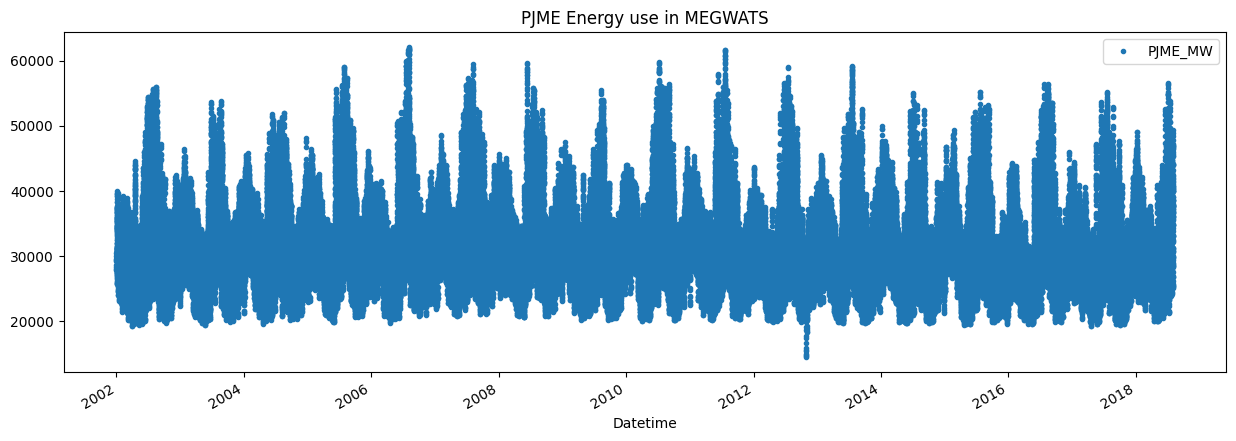

In [100]:
dataset.plot(style ='.',
             figsize = (15,5),
             color= color_pal,
             title = "PJME Energy use in MEGWATS"
             )

Splitting the traing and test set

In [101]:
train = dataset.iloc[dataset.index < '01-01-2015 ']
test = dataset.iloc[dataset.index >= '01-01-2015']

Visulaizing the train and test split in the dataset

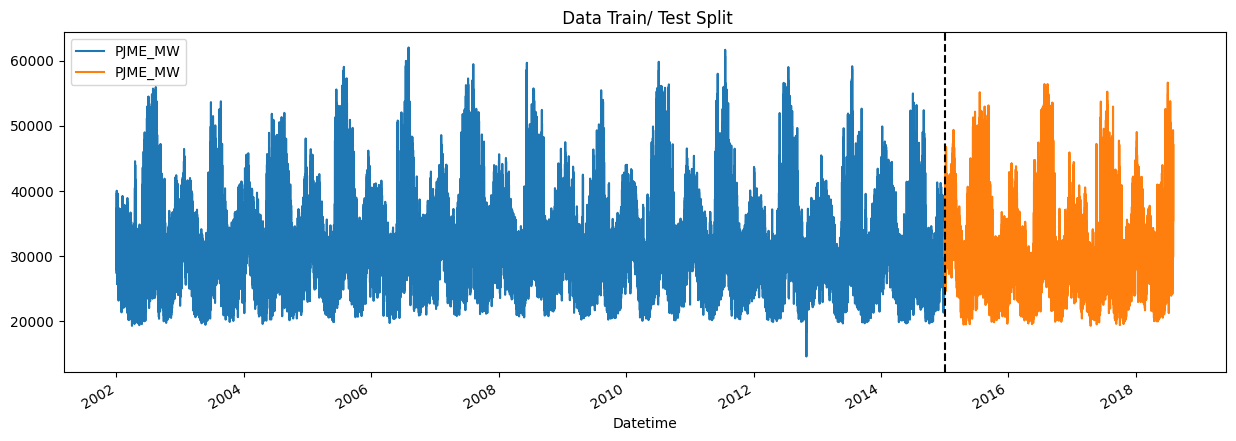

In [102]:
fig, ax =plt.subplots(figsize=(15,5))
train.plot(ax = ax, label = " Training set", title = " Data Train/ Test Split")
test.plot(ax = ax, label = "Test set")
ax.axvline('01-01-2015', color = "black",  ls = '--')
plt.show()


Visualising the one week of data

<Axes: xlabel='Datetime'>

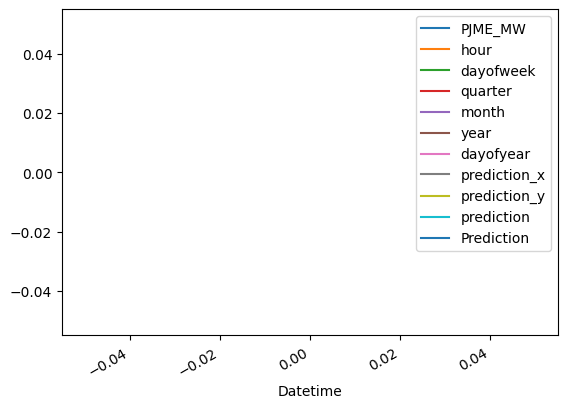

In [195]:
dataset.loc[(dataset.index> '01-01-2018') & (dataset.index < '01-08-2010')].plot()

**Feature Creation**

In [196]:
def Create_features(dataset):
    dataset = dataset.copy()
    dataset['hour'] = dataset.index.hour
    dataset['dayofweek'] = dataset.index.dayofweek
    dataset['quarter'] = dataset.index.quarter
    dataset['month'] = dataset.index.month
    dataset['year'] = dataset.index.year
    dataset[ 'dayofyear'] = dataset.index.dayofyear
    return dataset

dataset = Create_features(dataset)


Visulaize our Feature / Target Relationship

<ipython-input-197-9a0e8fb00943>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='hour', y = 'PJME_MW',palette='cubehelix')


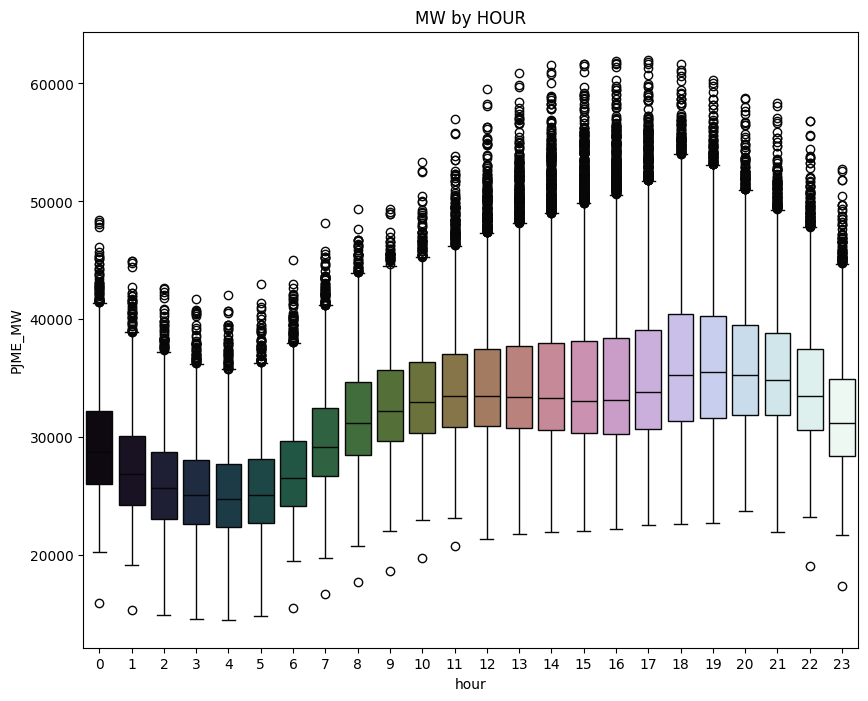

In [197]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=dataset, x='hour', y = 'PJME_MW',palette='cubehelix')
ax.set_title("MW by HOUR")
plt.show()

<ipython-input-198-162c6ad0e0e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='month', y = 'PJME_MW',palette ='magma')


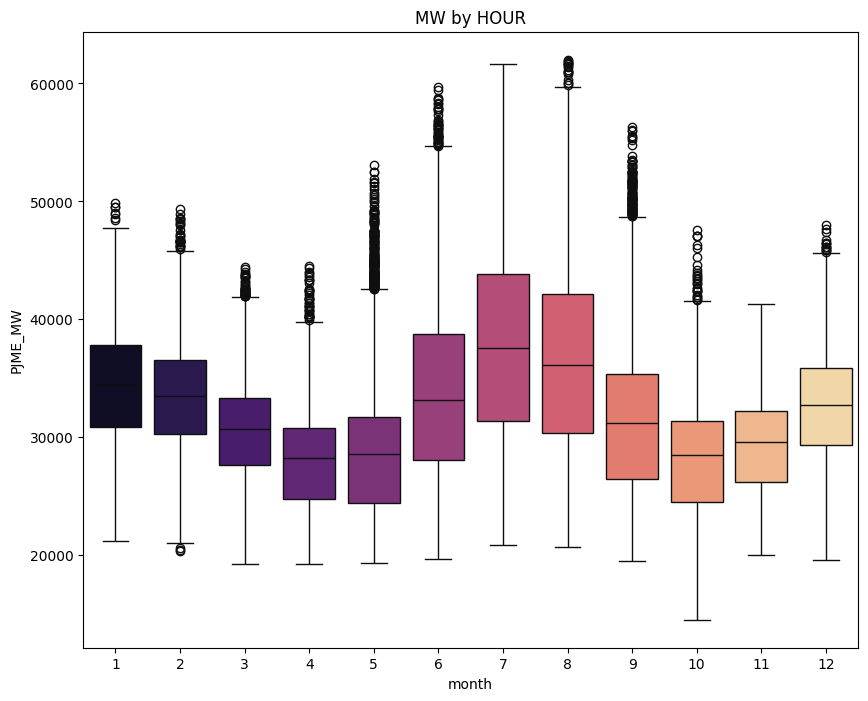

In [198]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=dataset, x='month', y = 'PJME_MW',palette ='magma')
ax.set_title("MW by HOUR")
plt.show()

**Create our model**

In [199]:
train = Create_features(train)
test = Create_features(test)

In [200]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear']
TARGET ='PJME_MW'

In [201]:
dataset.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'prediction_x', 'prediction_y', 'prediction', 'Prediction'],
      dtype='object')

In [202]:
X_train = train[FEATURES]
Y_train =train[TARGET]

X_test = test[FEATURES]
Y_test =test[TARGET]


In [203]:
X_test

,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,
2015-01-01 00:00:00,0,3,1,1,2015,1
2015-12-31 01:00:00,1,3,4,12,2015,365
2015-12-31 02:00:00,2,3,4,12,2015,365
2015-12-31 03:00:00,3,3,4,12,2015,365
2015-12-31 04:00:00,4,3,4,12,2015,365
...,...,...,...,...,...,...
2018-01-01 20:00:00,20,0,1,1,2018,1
2018-01-01 21:00:00,21,0,1,1,2018,1
2018-01-01 22:00:00,22,0,1,1,2018,1


In [204]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, Y_train,
        eval_set=[(X_train, Y_train), (X_test, Y_test)],
        verbose=100)

[0]	validation_0-rmse:32605.13970	validation_1-rmse:31657.15729


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:21:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12584.35462	validation_1-rmse:11747.28803
[200]	validation_0-rmse:5837.33066	validation_1-rmse:5363.58554
[300]	validation_0-rmse:3923.28511	validation_1-rmse:4020.48045
[400]	validation_0-rmse:3447.54638	validation_1-rmse:3860.60088
[500]	validation_0-rmse:3288.19208	validation_1-rmse:3816.37862
[600]	validation_0-rmse:3206.55619	validation_1-rmse:3779.04119
[700]	validation_0-rmse:3153.61368	validation_1-rmse:3754.45684
[800]	validation_0-rmse:3114.34038	validation_1-rmse:3738.38209
[900]	validation_0-rmse:3084.39550	validation_1-rmse:3730.01893
[988]	validation_0-rmse:3060.25324	validation_1-rmse:3728.07396


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [205]:
reg.feature_importances_

array([0.34923965, 0.1818622 , 0.05740253, 0.24737705, 0.02602268,
       0.13809589], dtype=float32)

In [206]:
reg.feature_names_in_

array(['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear'],
      dtype='<U9')

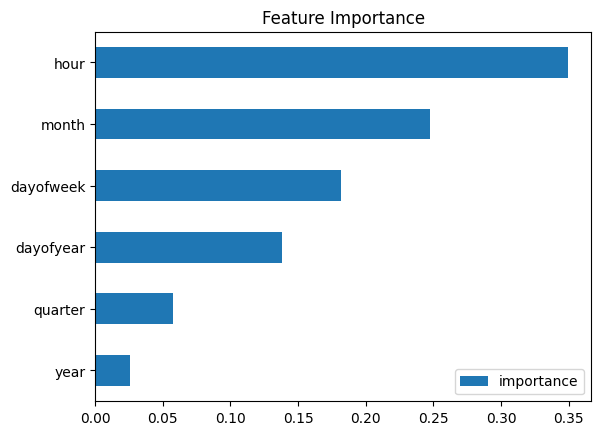

In [207]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Forecast on test

In [208]:
test['Prediction']=reg.predict(X_test)

In [209]:
dataset =dataset.merge(test[['Prediction']],how ='left', left_index= True,right_index =True)

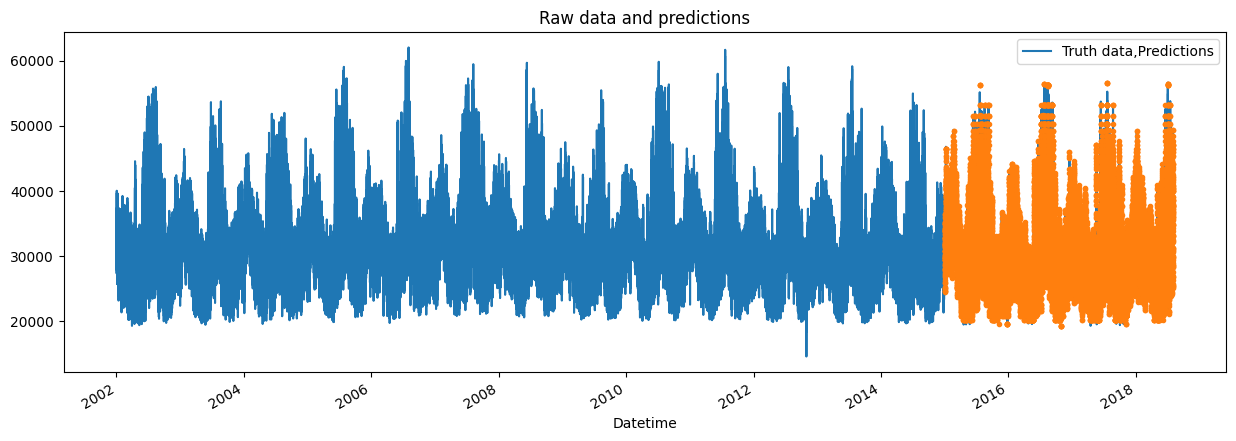

In [210]:
ax = dataset[['PJME_MW']].plot(figsize = (15,5))
dataset['prediction'].plot(ax=ax,style=".")
plt.legend(['Truth data,Predictions'])
ax.set_title('Raw data and predictions')
plt.show()

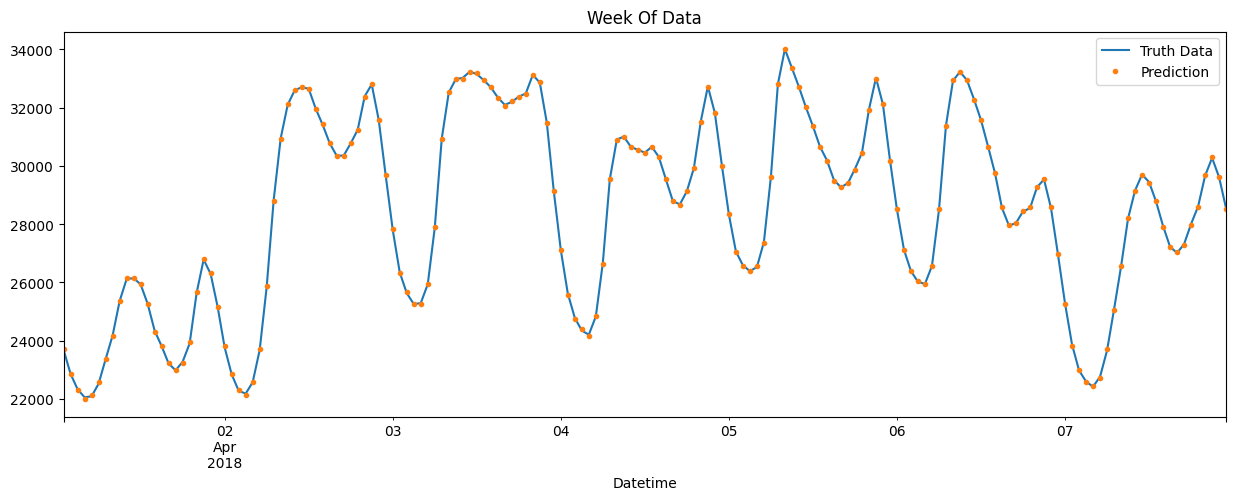

In [211]:
ax = dataset.loc[(dataset.index > '04-01-2018') & (dataset.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
dataset.loc[(dataset.index > '04-01-2018') & (dataset.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()